__Source:__ https://subscription.packtpub.com/book/data/9781800566927/3/ch03lvl1sec20/feature-engineering
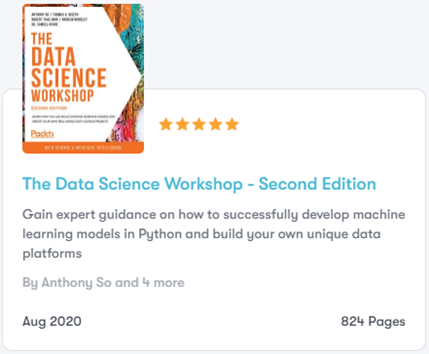

In [58]:
# Can source data from above link...
# Need to change all links to source data.....

__File contains:__ <br>
__1.__ Business Hypothesis Testing <br>
__2.__ Feature Engineering <br>
__3.__ Modeling, SMOTE, etc. <br>   

<h1 style="background-color:orange;">
Chaper 3</h1>

In [59]:
import os as os
os.chdir(r'C:\Users\Fam\Desktop\Dedda\New key\Rstuff\Packt\1. TheDataScienceWS\3.Ch3')
os.getcwd()

'C:\\Users\\Fam\\Desktop\\Dedda\\New key\\Rstuff\\Packt\\1. TheDataScienceWS\\3.Ch3'

In [60]:
import pandas as pd
!pip install altair
import altair as alt
df = pd.read_csv('Exercise_3_02.csv')
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h2 style="background-color:powderblue;">
Activity 3.01: Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits
</h2>

In [61]:
# Getting the total counts under each job category
jobTot = df.groupby(['job'])['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [62]:
# Getting all the details in one place
jobProp = df.groupby(['job', 'y'])['y'].agg(JobCat='count').reset_index()
jobProp

,job,y,JobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [63]:
# Merge the two df
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['CatProp'] = (jobComb.JobCat/jobComb.jobTot)*100
jobComb

,job,y,JobCat,jobTot,CatProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312
5,entrepreneur,yes,123,1487,8.271688
6,housemaid,no,1131,1240,91.209677
7,housemaid,yes,109,1240,8.790323
8,management,no,8157,9458,86.244449
9,management,yes,1301,9458,13.755551


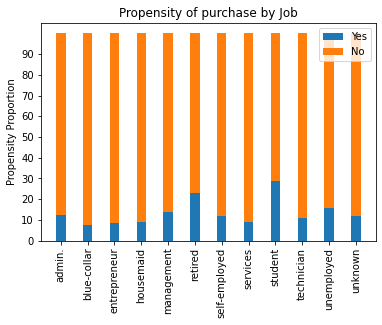

In [64]:
# Plot
import matplotlib.pyplot as plt
import numpy as np
jobcombYes = jobComb[jobComb['y']=='yes']
jobcombNo = jobComb[jobComb['y']=='no']
xlabels = jobTot['job'].nunique()
jobYes = jobcombYes['CatProp'].unique()
jobNo = jobcombNo['CatProp'].unique()

ind = np.arange(xlabels)
# Get the width of each bar
width = 0.35  
# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)
plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

plt.legend((p1[0], p2[0]), ('Yes', 'No'))
# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()

<h2 style="background-color:powderblue;">
Exercise 3.02: Business Hypothesis Testing for Age versus Propensity for a Term Loan</h2>

In [65]:
# Step 4
filter_mask = df['y'] == 'yes'
bankSub1 = df[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [66]:
# Visualisting the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [67]:
# Getting another perspective
ageTot = df.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head(10)

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129
5,23,202
6,24,302
7,25,527
8,26,805
9,27,909


In [68]:
# Getting all the details in one place
ageProp = df.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [69]:
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
#ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb['catProp'] = (ageComb['ageCat']/ageComb['ageTot'])*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [70]:
# Visulising
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')
#alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

<h2 style="background-color:powderblue;">
Exercise 3.03: Feature Engineering – Exploration of Individual Features</h2>

In [71]:
# Find relationship between housing and propensity for TD
df.groupby(['housing','y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


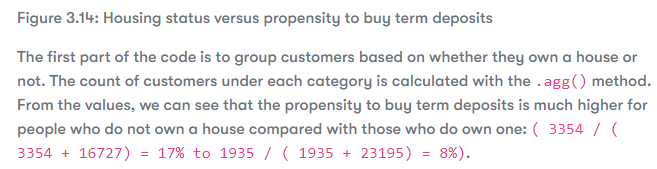

In [72]:
#df.head()
# Find relationship between loan and propensity for TD
df.groupby(['loan','y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [73]:
print('Propensity when Loan = no :',4805 / (4805+33162))
print('Propensity when Loan = yes:',484 / (484+6760))

Propensity when Loan = no : 0.12655727342165565
Propensity when Loan = yes: 0.06681391496410823


In [74]:
# To convert numerical values into ordinal values, we first find the quantile values and take 
# them as threshold values. The quantiles are obtained using the following code snippet:
import numpy as np
np.quantile(df['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [75]:
# Now, convert the numerical values of bank balances into categorical values, as mentioned in the following 
# code snippet:
df['balanceClass'] = 'Quant1'
df.loc[(df['balance'] > 72) & (df['balance'] < 448), 'balanceClass'] = 'Quant2'
df.loc[(df['balance'] > 448) & (df['balance'] < 1428), 'balanceClass'] = 'Quant3'
df.loc[df['balance'] > 1428, 'balanceClass'] = 'Quant4'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [76]:
# Find the propensity of term deposit purchases based on each quantile
# Calculating the customers under each quantile 
balanceTot = df.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [77]:
""" Calculating the total customers categorised as per quantile and propensity classification """
balanceProp = df.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [78]:
# Merging both the data frames
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


<h2 style="background-color:powderblue;">
Exercise 3.04: Feature Engineering – Creating New Features from Existing Ones</h2>

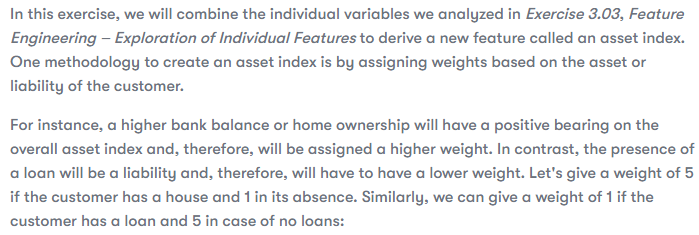

In [79]:
# Normalizing data
from sklearn import preprocessing
x = df[['balance']].values.astype(float)

In [80]:
# Transform the balance data by normalizing it with minmaxScaler:
minmaxScaler = preprocessing.MinMaxScaler()
df['balanceTran'] = minmaxScaler.fit_transform(x)

In [81]:
# After creating the normalized variable, add a small value of 0.001 so as to eliminate the 0 
# values in the variable. This is mentioned in the following code snippet:
# Adding a small numerical constant to eliminate 0 values
df['balanceTran'] = df['balanceTran'] + 0.00001

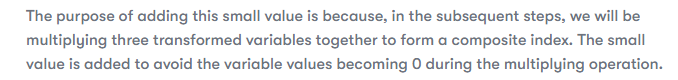

In [82]:
# Let us transform values for loan data
df['loanTran'] = 1
# Giving a weight of 5 if there is no loan
df.loc[df['loan'] == 'no', 'loanTran'] = 5
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [83]:
# Let us transform values for Housing data
df['houseTran'] = 5
df.loc[df['housing'] == 'no', 'houseTran'] = 1
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [84]:
""" Let us now create the new variable which is a product of all these """
df['assetIndex'] = df['balanceTran'] * df['loanTran'] * df['houseTran']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


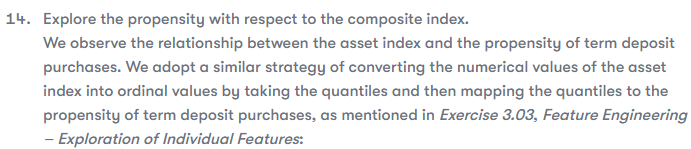

In [85]:
# Finding the quantile
np.quantile(df['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [86]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df['assetClass'] = 'Quant1'
df.loc[(df['assetIndex'] > 0.38) & (df['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
df.loc[(df['assetIndex'] > 0.57) & (df['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
df.loc[df['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
df.head()
df.assetClass[df['assetIndex'] > 1.9] = 'Quant4'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [87]:
# Calculating total of each asset class
assetTot = df.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = df.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [88]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


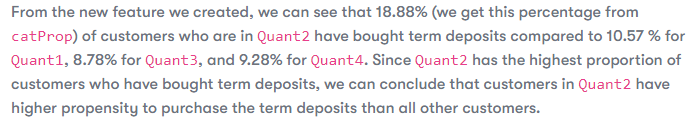
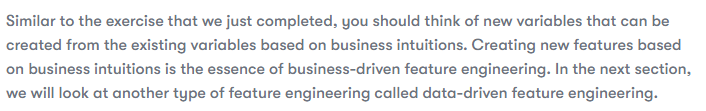

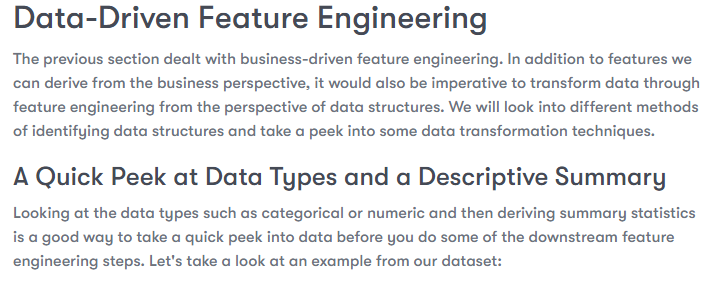

<h2 style="background-color:powderblue;">
Exercise 3.06: A Logistic Regression Model for Predicting the Propensity of Term Deposit Purchases in a Bank</h2>

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [90]:
""" Converting all the categorical variables to dummy variables """
bankCat = pd.get_dummies\
          (df[['job','marital', 'education','default','housing', 'loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [91]:
# Seperate the num & cat
bankNum = df[['age','balance','day','duration', 'campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [92]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,5,198,1,-1,0


In [93]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [94]:
bankModel = LogisticRegression(max_iter=2000)
bankModel.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [95]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model' 'prediction on test set: {:.2f}'\
      .format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression modelprediction on test set: 0.90


In [96]:
# Confusion Matrix for the model
from sklearn.metrics import accuracy_score
print('Confusion matrix')
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
print ("\nTrain Accuracy:",round(accuracy_score(y_test,pred),4))

Confusion matrix
[[11707   291]
 [ 1061   505]]

Train Accuracy: 0.9003


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11998
         yes       0.63      0.32      0.43      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [98]:
print('Actual 0s:', 11707 + 291)
print('Actual 1s:', 1061 + 505,'\n')

print('recall   :', 505/(505+1061))
print('precision:', 11707/(11707+1061),'\n')

# From file
print('The reverse (swap TP for TN)... is that a thing (notes suggest it is?')
print('recall   :', 11707/(11707+291))
print('precision:', 11707/(11707 + 505),'\n')

## Testing something from chapter 6
from sklearn.metrics import recall_score
print('Alternate Recall scores')
print('macro   :', recall_score(y_test, pred, average='macro'))
print('micro   :', recall_score(y_test, pred, average='micro'))
print('None    :', recall_score(y_test, pred, average=None))
print('weighted:', recall_score(y_test, pred, average='weighted'),'\n')

print('test')
print('macro is the average of both pos + neg recall',(0.322477650063857+0.9757459576596099)/2)

Actual 0s: 11998
Actual 1s: 1566 

recall   : 0.322477650063857
precision: 0.9169016290726817 

The reverse (swap TP for TN)... is that a thing (notes suggest it is?
recall   : 0.9757459576596099
precision: 0.9586472322305929 

Alternate Recall scores
macro   : 0.6491118038617334
micro   : 0.9003243880861103
None    : [0.97574596 0.32247765]
weighted: 0.9003243880861103 

test
macro is the average of both pos + neg recall 0.6491118038617334


<h2 style="background-color:powderblue;">
Activity 3.02: Model Iteration 2 – Logistic Regression Model with Feature Engineered Variables</h2>

In [99]:
# Categorical variables, removing loan and housing
bankCat1 = pd.get_dummies(df[['job','marital','education','default','contact','month','poutcome']])
print('bankCat1', bankCat1.shape)

bankCat1 (45211, 40)


In [100]:
bankNum1 = df[['age','day','duration','campaign','pdays','previous','assetIndex']]
print('bankNum1', bankNum1.shape)
bankNum1.head()

bankNum1 (45211, 7)


,age,day,duration,campaign,pdays,previous,assetIndex
0,58,5,261,1,-1,0,2.306734
1,44,5,151,1,-1,0,1.826916
2,33,5,76,1,-1,0,0.364158
3,47,5,92,1,-1,0,2.162153
4,33,5,198,1,-1,0,0.364112


In [101]:
#Create the transformation variables:
ageT1 = bankNum1[['age']].values.astype(float)
dayT1 = bankNum1[['day']].values.astype(float)
durT1 = bankNum1[['duration']].values.astype(float)

#Transform the balance data by normalizing it with minmaxScaler:
bankNum1['ageTran'] = minmaxScaler.fit_transform(ageT1)
bankNum1['dayTran'] = minmaxScaler.fit_transform(dayT1)
bankNum1['durTran'] = minmaxScaler.fit_transform(durT1)

#Create a new numerical variable by selecting the transformed variables:
bankNum2 = bankNum1[['ageTran','dayTran','durTran', 'campaign','pdays','previous', 'assetIndex']]

In [102]:
# Preparing the X variables
X = pd.concat([bankCat1, bankNum2], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['y']
print(Y.shape)
X.head()

(45211, 47)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.519481,0.133333,0.053070,1,-1,0,2.306734
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.337662,0.133333,0.030704,1,-1,0,1.826916
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.133333,0.015453,1,-1,0,0.364158
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.376623,0.133333,0.018707,1,-1,0,2.162153
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.133333,0.040260,1,-1,0,0.364112


In [103]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [104]:
from sklearn.linear_model import LogisticRegression
# Defining the LogisticRegression function
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy of Logistic regression model', 'prediction on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.90


In [105]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[11750   248]
 [ 1101   465]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     11998
         yes       0.65      0.30      0.41      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



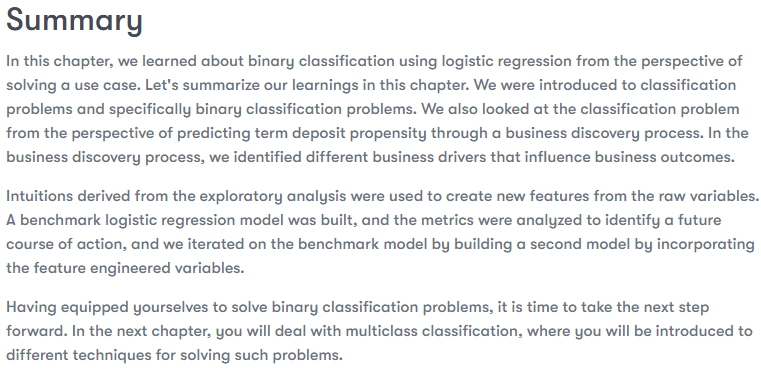

<h1 style="background-color:orange;">
Chaper 6</h1>

<h2 style="background-color:powderblue;">
Exercise 6.05: Creating a Classification Model for Computing Evaluation Metrics</h2>

In [106]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [107]:
# data doesn't have headers, so let's create headers
_headers = ['buying', 'maint', 'doors', 'persons', \
            'lug_boot', 'safety', 'car']
# read in cars dataset
df = pd.read_csv('https://raw.githubusercontent.com/'\
                 'PacktWorkshops/The-Data-Science-Workshop/'\
                 'master/Chapter06/Dataset/car.data', \
                 names=_headers, index_col=None)
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [108]:
# encode categorical variables
_df = pd.get_dummies(df, columns=['buying', 'maint', 'doors','persons', 'lug_boot', 'safety'])
_df.head()

,car,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [109]:
# split data into training and evaluation datasets
features = _df.drop('car', axis=1).values
labels = _df['car'].values
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.3, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [110]:
# train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [111]:
# make predictions for the validation set
y_pred = model.predict(X_val)
y_pred[0:9]

array(['unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'vgood', 'unacc',
       'unacc'], dtype=object)

In [112]:
# See above (Control find, to get more details on these)
from sklearn.metrics import precision_score
print(precision_score(y_val, y_pred, average='macro'))
print(precision_score(y_val, y_pred, average='micro'))
print(precision_score(y_val, y_pred, average=None))
print(precision_score(y_val, y_pred, average='weighted'))

0.8184395261601145
0.8996138996138996
[0.73214286 0.66666667 0.95187166 0.92307692]
0.896147525349206


<h2 style="background-color:powderblue;">
Activity 6.01: Train Three Different Models and Use Evaluation Metrics to Pick
the Best Performing Model</h2>

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com'\
                 '/PacktWorkshops/The-Data-Science-Workshop'\
                 '/master/Chapter06/Dataset'\
                 '/bank-additional-full.csv', sep=';')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [116]:
#Convert categorical variables using pd.get_dummies():
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', \
            'day_of_week', 'poutcome']
_df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [117]:
X = _df.drop(['y'], axis=1)
X = X.values
y = df['y'].apply(lambda x: 0 if x == 'no' else 1)
y = y.values

train_X, eval_X, train_y, eval_y = train_test_split(X, y, test_size=0.3, random_state=0)
val_X, test_X, val_y, test_y = train_test_split(eval_X, eval_y, random_state=0)

In [123]:
from sklearn.metrics import precision_score
lr_model = LogisticRegression(random_state=42,max_iter=2000)
lr_model.fit(train_X, train_y)
lr_preds = lr_model.predict(val_X)
lr_report = classification_report(val_y, lr_preds)

####
from sklearn.metrics import confusion_matrix
pred = lr_model.predict(val_X) #(X_test)
confusionMatrix = confusion_matrix(val_y, pred) #y_test
print(confusionMatrix)
# QA
print('recall_qa     :', 430/(430+617))
#print('macro   :', recall_score(val_y, pred, average='macro'))
#print('micro   :', recall_score(val_y, pred, average='micro'))
print('None_recall   :', recall_score(val_y, pred, average=None))
print('None_Precision:', precision_score(val_y, pred, average=None),'\n')

print(lr_report)

[[7996  224]
 [ 617  430]]
recall_qa     : 0.41069723018147086
None_recall   : [0.97274939 0.41069723]
None_Precision: [0.9283641  0.65749235] 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8220
           1       0.66      0.41      0.51      1047

    accuracy                           0.91      9267
   macro avg       0.79      0.69      0.73      9267
weighted avg       0.90      0.91      0.90      9267



In [120]:
dt_model = DecisionTreeClassifier(random_state=42,max_depth= 6)
dt_model.fit(train_X, train_y)
dt_preds = dt_model.predict(val_X)
dt_report = classification_report(val_y, dt_preds)

####
print('recall_qa     :', 567/(567+480))
pred = dt_model.predict(val_X)
confusionMatrix = confusion_matrix(val_y, pred)
print(confusionMatrix)
print('None_recall   :', recall_score(val_y, pred, average=None))
print('None_Precision:', precision_score(val_y, pred, average=None),'\n')
####

print(dt_report)

recall_qa     : 0.5415472779369628
[[7932  288]
 [ 480  567]]
None_recall   : [0.9649635  0.54154728]
None_Precision: [0.94293866 0.66315789] 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8220
           1       0.66      0.54      0.60      1047

    accuracy                           0.92      9267
   macro avg       0.80      0.75      0.78      9267
weighted avg       0.91      0.92      0.91      9267



In [121]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_X, train_y)
rf_preds = rf_model.predict(val_X)
rf_report = classification_report(val_y, rf_preds)

####
print('recall_qa     :', 496/(496+551))
pred = rf_model.predict(val_X)
confusionMatrix = confusion_matrix(val_y, pred)
print(confusionMatrix)
print('None_recall   :', recall_score(val_y, pred, average=None))
print('None_Precision:', precision_score(val_y, pred, average=None),'\n')
####

print(rf_report)

recall_qa     : 0.47373447946513847
[[7989  231]
 [ 551  496]]
None_recall   : [0.97189781 0.47373448]
None_Precision: [0.93548009 0.68225585] 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8220
           1       0.68      0.47      0.56      1047

    accuracy                           0.92      9267
   macro avg       0.81      0.72      0.76      9267
weighted avg       0.91      0.92      0.91      9267



In [125]:
# Takes too long to run (as expected (180 fits))
# 2nd part of code (double ## not converted in the copy and paste of code)
# # Testing some code from "Statistics for Machine Learning"
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# pipeline = Pipeline([ ('clf',RandomForestClassifier(criterion='gini'))])
# parameters = {'clf__n_estimators':(1000,2000,3000),
#               'clf__max_depth':(100,200,300),
#               'clf__min_samples_split':(2,3),
#               'clf__min_samples_leaf':(1,2) }

# grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
# grid_search.fit(train_X, train_y)

# print ('Best Training score: %0.3f' % grid_search.best_score_)
# print ('Best parameters set:')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print ('\t%s: %r' % (param_name, best_parameters[param_name]))

# predictions = grid_search.predict(eval_X)
# #print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
# #print ("\nComplete report of Testing data\n",classification_report(y_test, ... predictions))
# #print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n", pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames = ["Predicted"]))


# #train_X, eval_X, train_y, eval_y = train_test_split(X, y, test_size=0.3, random_state=0)
# #val_X, test_X, val_y, test_y = train_test_split(eval_X, eval_y, random_state=0)

<h1 style="background-color:orange;">
Chaper 7</h1>

<h2 style="background-color:powderblue;">
7. The Generalization of Machine Learning Models</h2>

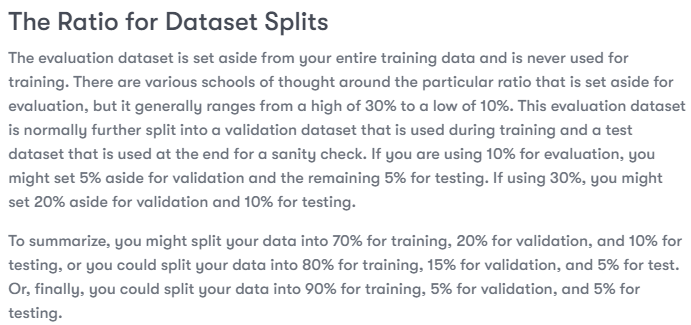

In [ ]:
# data doesn't have headers, so let's create headers
_headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']
# read in cars dataset
df = pd.read_csv('https://raw.githubusercontent.com/'\
                 'PacktWorkshops/The-Data-Science-Workshop/'\
                 'master/Chapter07/Dataset/car.data', \
                 names=_headers, index_col=None)

In [ ]:
#split the data into 80% for training and 20% for evaluation
training_df, eval_df = train_test_split(df, train_size=0.8, random_state=0)

<h2 style="background-color:powderblue;">
Exercise 7.05: Getting the Scores from Five-Fold Cross-Validation</h2>

In [ ]:
# encode categorical variables
_df = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
_df.head()

In [ ]:
# separate features and labels DataFrames
features = _df.drop(['car'], axis=1).values
labels = _df[['car']].values

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.linear_model import LogisticRegression

_lr = LogisticRegression()
from sklearn.model_selection import cross_val_score
_scores = cross_val_score(_lr, features, labels, cv=5, scoring='recall')
print('Scores    :', _scores)
print('Mean Score:', _scores.mean())

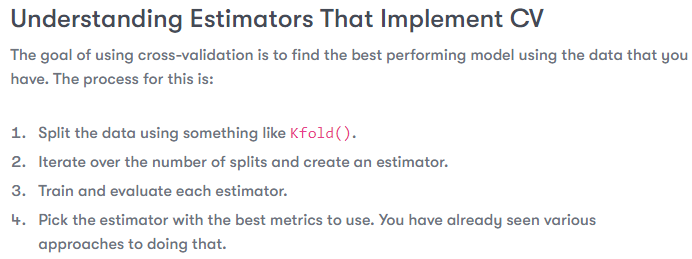

<h2 style="background-color:powderblue;">
Exercise 7.07: Using Grid Search with Cross-Validation to Find the Best Parameters for a Model</h2>

In [ ]:
#### using above data - not starting from scratch like in the notes
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 8)}
clf_cv  = GridSearchCV(clf, param_grid=params, cv=5)
clf_cv.fit(features, labels)

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

print('Scores    :', clf_cv)
print('Mean Score:', scores.mean())

<h1 style="background-color:orange;">
Chaper 11</h1>

<h2 style="background-color:powderblue;">
Exercise 11.03: Fixing Incorrect Values in the State Column</h2>

In [80]:
# source: https://packt.live/2MZJsrk
import os as os 
import pandas as pd
os.chdir(r'C:\Users\Fam\Desktop\Dedda\New key\Rstuff\Packt\1. TheDataScienceWS\11.Ch11')
df = pd.read_excel('data.xlsx', index_col=0)  
df.head()

,City,State,Zip,Title,RedactionRequested
ID,,,,,
804,Glenview,IL,60025,Treasurer,False
9177,Harrisburg,IL,62946,Treasurer,False
53011,Chicago,IL,60606,Treasurer,False
9176,Harrisburg,IL,62946,Chairman,False
33020,Mechanicsburg,IL,62545,Chairman,False


In [81]:
# Great code to get details of freq of vals
def describe_object(df, col_name):
    print(f"\nCOLUMN: {col_name}")
    print(f"{df[col_name].nunique()} different values")
    print(f"List of values:")
    print(df[col_name].value_counts(dropna=False, normalize=True))
    #a = df[col_name].value_counts(dropna=False, normalize=True)
    
dec = describe_object(df, 'State')    


COLUMN: State
49 different values
List of values:
IL     0.971529
Il     0.012044
DC     0.004600
NaN    0.002155
MO     0.001920
NY     0.000869
IA     0.000743
IN     0.000743
PA     0.000598
CA     0.000580
WI     0.000561
VA     0.000398
TX     0.000380
MA     0.000326
MI     0.000290
OH     0.000290
MN     0.000217
FL     0.000199
GA     0.000199
TN     0.000145
MD     0.000109
il     0.000109
NC     0.000109
CO     0.000091
OR     0.000054
WA     0.000054
NM     0.000054
KS     0.000036
VT     0.000036
CT     0.000036
NH     0.000036
AR     0.000036
SC     0.000036
NJ     0.000036
NV     0.000036
ng     0.000036
RI     0.000036
LA     0.000036
II     0.000036
DE     0.000018
60     0.000018
SD     0.000018
iL     0.000018
I      0.000018
OK     0.000018
KY     0.000018
8I     0.000018
AZ     0.000018
PR     0.000018
In     0.000018
Name: State, dtype: float64


In [82]:
# Look for variants of this this state
for state in ['Il', 'iL', 'Il']:
    print(df.loc[df['State'] == state, ['City', 'State']])

            City State
ID                    
40846     Ottawa    Il
48875     Ottawa    Il
29836  Galesburg    Il
26659    Chicago    Il
26660    Chicago    Il
...          ...   ...
30435    Chicago    Il
30436    Chicago    Il
45800    Chicago    Il
49543    Chicago    Il
49544    Chicago    Il

[665 rows x 2 columns]
          City State
ID                  
41738  Wheaton    iL
            City State
ID                    
40846     Ottawa    Il
48875     Ottawa    Il
29836  Galesburg    Il
26659    Chicago    Il
26660    Chicago    Il
...          ...   ...
30435    Chicago    Il
30436    Chicago    Il
45800    Chicago    Il
49543    Chicago    Il
49544    Chicago    Il

[665 rows x 2 columns]


In [83]:
# Create mask
il_mask = df['State'].isin(['il', 'Il', 'iL', 'Il'])
il_mask.sum()

672

In [84]:
df['State_il'] = df['State'].isin(['il', 'Il', 'iL', 'Il', 'IL'])
a = df[df['State_il']==True]
b = a.groupby(['State'])['State'].agg(State_count = 'count')
b

,State_count
State,
IL,53642
Il,665
iL,1
il,6


In [85]:
# Using the pandas .loc() method, subset the rows with the il_mask condition mask and 
# replace the value of the State column with IL:
df.loc[il_mask, 'State'] = 'IL'

# then re-check values
df['State_il'] = df['State'].isin(['il', 'Il', 'iL', 'Il', 'IL'])
a = df[df['State_il']==True]
b = a.groupby(['State'])['State'].agg(State_count = 'count')
b

,State_count
State,
IL,54314


In [86]:
# More changes
c  = df[df['State']=='8I']
print('pre-change', c.shape)
# The part that changes it....
for val in ['II', 'I', '8I', '60']:
    df.loc[df['State'] == val, 'State'] = 'IL'
    
c  = df[df['State']=='8I']
print('post-change', c.shape)    

pre-change (1, 6)
post-change (0, 6)


<h1 style="background-color:orange;">
Chaper 13</h1>

<h2 style="background-color:powderblue;">
Exercise 13.01: Benchmarking the Logistic Regression Model on the Dataset</h2>

In [2]:
# source: https://packt.live/2MZJsrk
import os as os 
import pandas as pd
os.chdir(r'C:\Users\Fam\Desktop\Dedda\New key\Rstuff\Packt\1. TheDataScienceWS\13.Ch13')
#df = pd.read_excel('data.xlsx', index_col=0)  
df = pd.read_excel('data.xlsx')#, index_col=0)  
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankData = df.copy() 
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler() 

# Converting each of the columns to scaled version
bankData['ageScaled'] = rob_scaler.fit_transform\
                        (bankData['age'].values.reshape(-1,1))
bankData['balScaled'] = rob_scaler.fit_transform\
                        (bankData['balance']\
                         .values.reshape(-1,1))
bankData['durScaled'] = rob_scaler.fit_transform\
                        (bankData['duration']\
                         .values.reshape(-1,1))

# Dropping the original columns
bankData.drop(['age','balance','duration'], \
              axis=1, inplace=True)

# Convert all the categorical variables to dummy variables using the .get_dummies() function:
bankCat = pd.get_dummies(bankData[['job','marital','education',\
                                   'default','housing','loan',\
                                   'contact','month',\
                                   'poutcome']])

# Separate the numerical data and observe the shape:
bankNum = bankData[['ageScaled','balScaled','day', 'durScaled','campaign','pdays','previous']]

# # Merging with the original data frame
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1.266667,1.250000,5,0.375000,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.333333,-0.308997,5,-0.134259,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,-0.400000,-0.328909,5,-0.481481,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.533333,0.780236,5,-0.407407,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.400000,-0.329646,5,0.083333,1,-1,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# Defining the LogisticRegression function
bankModel = LogisticRegression(max_iter=1000)
bankModel.fit(X_train, y_train)

pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on '\
      'test set: {:.2f}'\
      .format(bankModel.score(X_test, y_test)))

# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

Accuracy of Logistic regression model prediction on test set: 0.90
[[11707   291]
 [ 1058   508]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11998
         yes       0.64      0.32      0.43      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [12]:
from sklearn.metrics import recall_score, precision_score
print('None_recall    (No | Yes):', recall_score(y_test, pred, average=None))
print('None_Precision (No | Yes):', precision_score(y_test, pred, average=None),'\n')

print('Percentage of No :',(y_train[y_train=='no'].value_counts()/len(y_train) ) * 100)
print('Percentage of Yes:',(y_train[y_train=='yes'].value_counts()/len(y_train) ) * 100)

None_recall    (No | Yes): [0.97574596 0.32439336]
None_Precision (No | Yes): [0.91711712 0.63579474] 

Percentage of No : no    88.235852
Name: y, dtype: float64
Percentage of Yes: yes    11.764148
Name: y, dtype: float64


<h2 style="background-color:powderblue;">
Exercise 13.03: Implementing SMOTE on Our Banking Dataset to Find the Optimal Result</h2>

In [13]:
# Shape before oversampling
print("Before OverSampling count of yes: {}".format(sum(y_train=='yes')))
print("Before OverSampling count of no: {} \n".format(sum(y_train=='no')))

Before OverSampling count of yes: 3723
Before OverSampling count of no: 27924 



In [14]:
# Already had to install this in CMD (crashed when truing to do here...)
#!pip install smote-variants
import smote_variants as sv
import numpy as np

In [15]:
# Instantiating the SMOTE class
oversampler= sv.SMOTE()
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os=='no')))

2023-01-02 14:56:25,510:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-01-02 14:56:25,537:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-01-02 14:56:25,539:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-01-02 14:56:26,204:INFO:SMOTE: simplex sampling with n_dim 2


After OverSampling, the shape of train_X: (55848, 51)
After OverSampling, the shape of train_y: (55848,) 

After OverSampling, counts of label 'Yes': 27924
After OverSampling, counts of label 'no': 27924


In [17]:
# Training the model with Logistic regression model
from sklearn.linear_model import LogisticRegression
bankModel2 = LogisticRegression(max_iter=1000)
bankModel2.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000)

In [19]:
pred = bankModel2.predict(X_test)
print('Accuracy of Logistic regression model prediction on '\
      'test set for Smote balanced data set: {:.2f}'\
      .format(bankModel2.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred),'\n')

print('None_recall    (No | Yes):', recall_score(y_test, pred, average=None))
print('None_Precision (No | Yes):', precision_score(y_test, pred, average=None),'\n')

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Fam\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy of Logistic regression model prediction on test set for Smote balanced data set: 0.85
[[10269  1729]
 [  320  1246]]
              precision    recall  f1-score   support

          no       0.97      0.86      0.91     11998
         yes       0.42      0.80      0.55      1566

    accuracy                           0.85     13564
   macro avg       0.69      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564
 

None_recall    (No | Yes): [0.85589265 0.79565773]
None_Precision (No | Yes): [0.96977996 0.41882353] 



In [20]:
# Using SMOTE, the recall for the 'yes' class has come up from 32% to 80%

<h2 style="background-color:powderblue;">
Exercise 13.04: Implementing MSMOTE on Our Banking Dataset to Find the Optimal Result</h2>

In [22]:
# Shape before oversampling
print("Before OverSampling count of yes: {}".format(sum(y_train=='yes')))
print("Before OverSampling count of no: {} \n".format(sum(y_train=='no')))

Before OverSampling count of yes: 3723
Before OverSampling count of no: 27924 



In [23]:
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os=='yes')))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os=='no')))

2023-01-02 15:02:58,719:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2023-01-02 15:02:58,740:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-01-02 15:02:58,764:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


After OverSampling, the shape of train_X: (55848, 51)
After OverSampling, the shape of train_y: (55848,) 

After OverSampling, counts of label 'Yes': 27924
After OverSampling, counts of label 'no': 27924


In [25]:
# Training the model with Logistic regression model
from sklearn.linear_model import LogisticRegression
# Defining the LogisticRegression function
bankModel3 = LogisticRegression(max_iter=1000)
bankModel3.fit(X_train_os, y_train_os)

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
pred = bankModel3.predict(X_test)
print('Accuracy of Logistic regression model prediction on '\
      'test set for MSMOTE balanced data set: {:.2f}'\
      .format(bankModel3.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

print('None_recall    (No | Yes):', recall_score(y_test, pred, average=None))
print('None_Precision (No | Yes):', precision_score(y_test, pred, average=None),'\n')

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Fam\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy of Logistic regression model prediction on test set for MSMOTE balanced data set: 0.85
[[10313  1685]
 [  322  1244]]
              precision    recall  f1-score   support

          no       0.97      0.86      0.91     11998
         yes       0.42      0.79      0.55      1566

    accuracy                           0.85     13564
   macro avg       0.70      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564

None_recall    (No | Yes): [0.85955993 0.79438059]
None_Precision (No | Yes): [0.96972261 0.42471833] 



In [27]:
# Using MSMOTE, the recall for the 'yes' class was improved in the unbalanced data...
# BUT results not as good as SMOTE

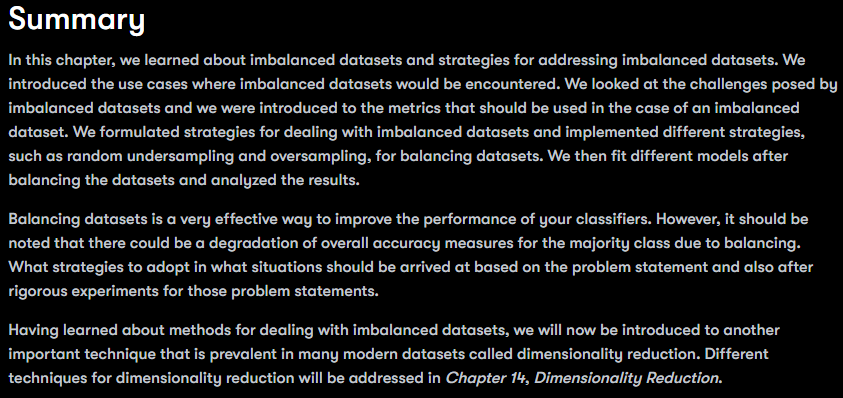